In [1]:
# Testing and learning legacy code

# Import classes and functions
from room import Room
from eda import csv_to_df, calc_stat, calc_comb_stat, print_to_file;
from plot import plot_box_all, plot_time_series_all, save, ts_pi; 

c:\Users\clair\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


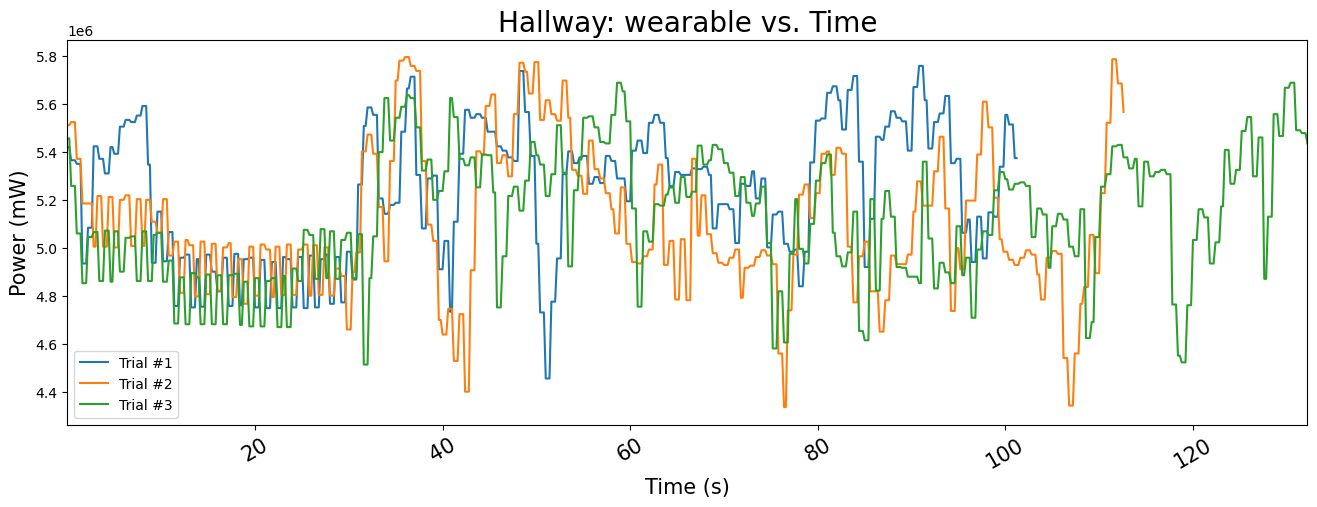

In [2]:
# Importing data
hallway_1 = csv_to_df('../../data/hallway1.csv', 0, 150, False)
hallway_2 = csv_to_df('../../data/hallway2.csv', 0, 150, False)
hallway_3 = csv_to_df('../../data/hallway3.csv', 0, 150, False)

hallway_scans = Room("Hallway")
# Just assigns all dataframs to the trials attribute of the Room object, doesn't actually combine
hallway_scans.trials = [hallway_1, hallway_2, hallway_3]
# print(hallway_scans.trials) #<- This is a list of dataframes
# type(hallway_scans.trials)

hallway_scans.plot_time_series_trials("wearable")

# output = './hallway_legacy_output.txt'


In [3]:
hallway_1.set_index('time', inplace=True)

In [4]:
hallway_1

,wearable,soc,cvip,cpu,gpu,5v_sys,nvme_pwr1,nvme_pwr3,nvme_pwr2,wlan,...,THERM_TOT_PWR-throttle,Tboard_soc1tmp,Tdiode_soc1tmp,battery,chrgr,ddr1,ddr2,mem,mero2,vrm
time,,,,,,,,,,,,,,,,,,,,,
0.003,5420000,1140000,1649000,731000,105000,6232000,79000,32000,11000,159000,...,25000000,118.4,114.80,91.40,112.7750,117.0500,115.1366,110.4116,118.0616,115.250
0.204,5420000,1408000,2138000,1078000,5465000,6232000,10000,32000,11000,159000,...,25000000,118.4,114.80,91.40,112.7750,117.0500,115.1366,110.4116,118.0616,115.250
0.402,5365000,1198000,1710000,751000,105000,6263000,20000,32000,11000,214000,...,25000000,118.4,114.80,91.40,112.8866,117.1616,115.1366,110.4116,118.1750,115.250
0.602,5365000,1309000,1378000,740000,105000,6263000,10000,32000,11000,214000,...,25000000,118.4,114.80,91.40,112.8866,117.1616,115.1366,110.4116,118.1750,115.250
0.802,5365000,914000,2194000,670000,105000,6263000,20000,32000,11000,214000,...,25000000,118.4,114.80,91.40,112.8866,117.1616,115.1366,110.4116,118.1750,115.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100.403,5514000,1287000,1853000,928000,105000,6267000,20000,35000,11000,294000,...,25000000,123.8,120.65,91.76,117.1616,122.4500,120.6500,113.5616,123.3500,120.425
100.604,5514000,1162000,1948000,867000,105000,6311000,20000,78000,11000,294000,...,25000000,123.8,120.65,91.58,117.1616,122.4500,120.7616,113.5616,123.4616,120.425
100.802,5514000,1251000,2375000,847000,105000,6311000,10000,35000,11000,294000,...,25000000,123.8,121.10,91.58,117.1616,122.4500,120.7616,113.5616,123.4616,120.425


In [5]:
import sklearn as sk
import sklearn.decomposition as skd

pca = skd.PCA()
testPCA = pca.fit_transform(hallway_1)

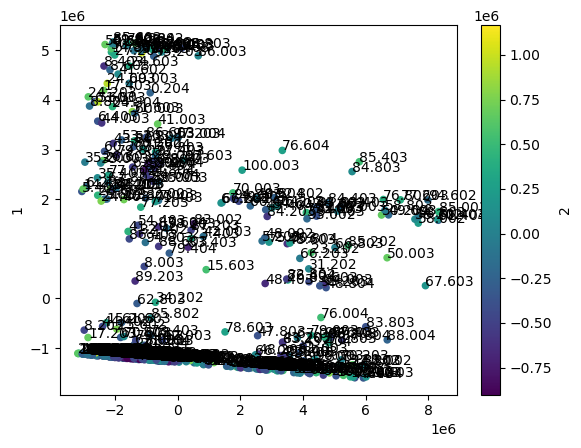

In [6]:
import pandas as pd
testPCA = pd.DataFrame(testPCA, index = hallway_1.index)

x = testPCA.plot.scatter(x=0, y=1, c=2, colormap='viridis')
for i, r in testPCA.iterrows():
    x.text(r[0], r[1], i)

In [7]:
ratios = pd.DataFrame({'PC': testPCA.columns, 'Ratios': pca.explained_variance_ratio_})
ratios

,PC,Ratios
0,0,6.452424e-01
1,1,3.124023e-01
2,2,1.518731e-02
3,3,1.058881e-02
4,4,9.310405e-03
5,5,2.597181e-03
6,6,2.368188e-03
7,7,1.698258e-03
8,8,5.237350e-04
9,9,6.512892e-05


<Axes: xlabel='PC'>

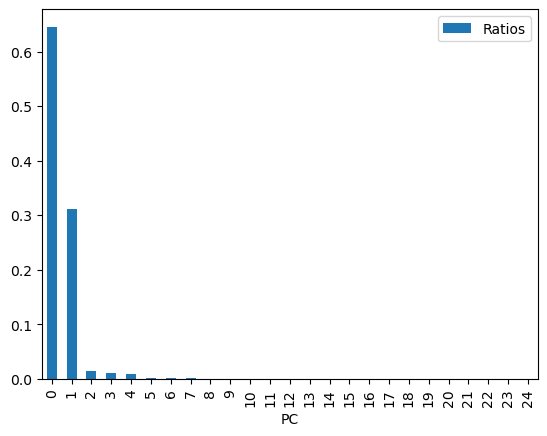

In [8]:
ratios.plot.bar(x='PC', y='Ratios')

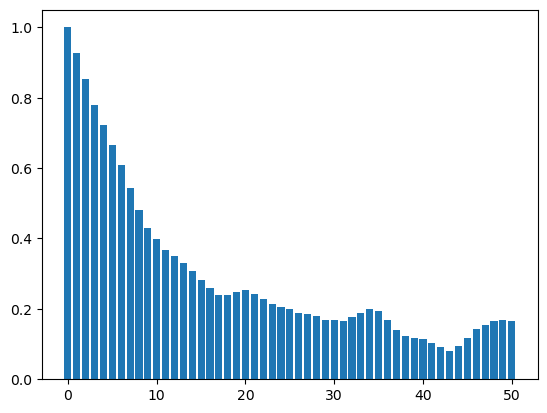

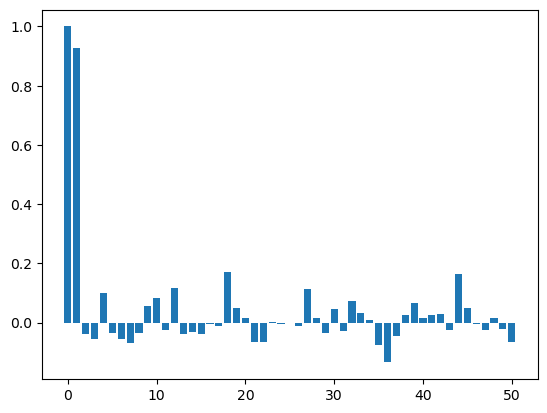

In [9]:
# ACF and PACF of hallway_1
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

# ACF
x = acf(hallway_1['wearable'], nlags=50)
plt.bar(range(len(x)), x)
plt.show()

# PACF
x = pacf(hallway_1['wearable'], nlags=50)
plt.bar(range(len(x)), x)
plt.show()

In [10]:
h1 = hallway_1.copy()
h1.index = h1.index.astype(float) * 1e9 # converting to nanoseconds
h1.index = pd.to_timedelta(h1.index, unit = 'ns')
h1

,wearable,soc,cvip,cpu,gpu,5v_sys,nvme_pwr1,nvme_pwr3,nvme_pwr2,wlan,...,THERM_TOT_PWR-throttle,Tboard_soc1tmp,Tdiode_soc1tmp,battery,chrgr,ddr1,ddr2,mem,mero2,vrm
time,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:00.003000,5420000,1140000,1649000,731000,105000,6232000,79000,32000,11000,159000,...,25000000,118.4,114.80,91.40,112.7750,117.0500,115.1366,110.4116,118.0616,115.250
0 days 00:00:00.204000,5420000,1408000,2138000,1078000,5465000,6232000,10000,32000,11000,159000,...,25000000,118.4,114.80,91.40,112.7750,117.0500,115.1366,110.4116,118.0616,115.250
0 days 00:00:00.402000,5365000,1198000,1710000,751000,105000,6263000,20000,32000,11000,214000,...,25000000,118.4,114.80,91.40,112.8866,117.1616,115.1366,110.4116,118.1750,115.250
0 days 00:00:00.602000,5365000,1309000,1378000,740000,105000,6263000,10000,32000,11000,214000,...,25000000,118.4,114.80,91.40,112.8866,117.1616,115.1366,110.4116,118.1750,115.250
0 days 00:00:00.802000,5365000,914000,2194000,670000,105000,6263000,20000,32000,11000,214000,...,25000000,118.4,114.80,91.40,112.8866,117.1616,115.1366,110.4116,118.1750,115.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 00:01:40.403000,5514000,1287000,1853000,928000,105000,6267000,20000,35000,11000,294000,...,25000000,123.8,120.65,91.76,117.1616,122.4500,120.6500,113.5616,123.3500,120.425
0 days 00:01:40.604000,5514000,1162000,1948000,867000,105000,6311000,20000,78000,11000,294000,...,25000000,123.8,120.65,91.58,117.1616,122.4500,120.7616,113.5616,123.4616,120.425
0 days 00:01:40.802000,5514000,1251000,2375000,847000,105000,6311000,10000,35000,11000,294000,...,25000000,123.8,121.10,91.58,117.1616,122.4500,120.7616,113.5616,123.4616,120.425


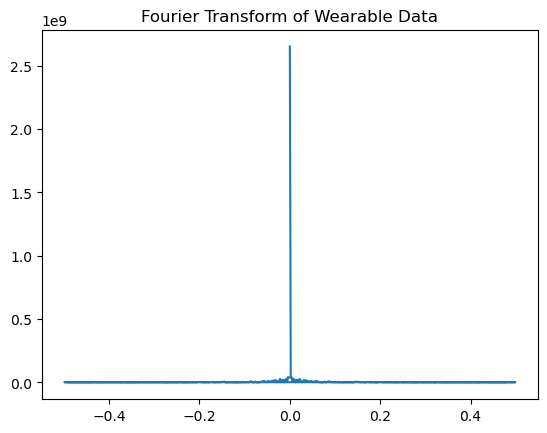

In [15]:
# use fourier transform to find periodicity
import numpy as np
from scipy.fftpack import fft
freqs = np.fft.fftfreq(len(h1['wearable']))
fft_values = np.abs(fft(h1['wearable']))

plt.plot(freqs, fft_values)
plt.title("Fourier Transform of Wearable Data")
plt.show()

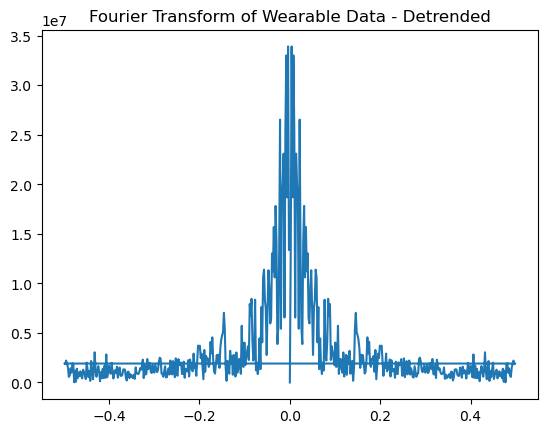

In [20]:
# try detrending
from scipy.signal import detrend

detrended = detrend(h1['wearable'])
fft_detrended = np.abs(fft(detrended))

plt.plot(freqs, fft_detrended)
plt.title("Fourier Transform of Wearable Data - Detrended")
plt.show()

In [19]:
from scipy.interpolate import interp1d

# Convert Timedelta to numerical values (e.g., milliseconds)


t = h1.index
signal = h1['wearable']
t_numeric = t.astype('timedelta64[ms]').astype(float)
interp_func = interp1d(t_numeric, signal, kind="cubic")  # Smoother interpolation
t_fine = np.linspace(t_numeric.min(), t_numeric.max(), len(t_numeric) * 10)  # Increase resolution
signal_fine = interp_func(t_fine)

fft_values = np.fft.fft(signal_fine)

TypeError: Cannot cast TimedeltaIndex to dtype float64

In [12]:
# looking further at pacf, indications of seasonality, explore further
from statsmodels.tsa.seasonal import STL

stl = STL(h1['wearable'], seasonal=13)
res = stl.fit()
res.plot()
trend = res.trend
season = res.seasonal
residual = res.resid

ValueError: Unable to determine period from endog

In [ ]:
comps = pd.DataFrame(pca.components_, columns=hallway_1.columns, index = testPCA.columns)
comps

# might want to z-score the data before running PCA here...

# sort by most significant components and what columns they are most related to
comp1 = comps.iloc[0]
comp1.sort_values(ascending=False)
comp1



wearable                  1.223387e-02
soc                      -8.019952e-03
cvip                      6.551322e-03
cpu                       4.668221e-02
gpu                       5.274467e-02
5v_sys                    1.175194e-02
nvme_pwr1                 2.317173e-05
nvme_pwr3                -7.070631e-04
nvme_pwr2                 8.984404e-05
wlan                      1.385088e-03
vddp_run                  3.467165e-04
vddp_s5                   1.478605e-04
LPDDR_PWR                 1.451929e-02
PROC_TOT_PWR              6.978379e-01
THERM_TOT_PWR             7.123571e-01
THERM_TOT_PWR-throttle   -0.000000e+00
Tboard_soc1tmp            1.773702e-07
Tdiode_soc1tmp            2.294393e-07
battery                   8.723252e-09
chrgr                     1.418552e-07
ddr1                      1.792278e-07
ddr2                      1.906071e-07
mem                       1.024818e-07
mero2                     1.782471e-07
vrm                       1.705486e-07
Name: 0, dtype: float64